# Lab2: Triple-or-Nothing Analysis

### Instructions:
- perform a fresh `restart & run all` before submitting the `.ipynb` to [gradescope](https://www.gradescope.com/courses/478298)
- [lab rubric](https://course.ccs.neu.edu/ds2500/admin_syllabus.html?highlight=rubric#weekly-lab-ds-2501)
- work in groups of 2-5
- be collaborative and kind
    - ask questions of others
    - invite questions from others
- each student will submit their own lab file
- please do not share code files 
    - however, unlike HW, you're welcome to look at each other's ungraded work

Answer each of the following questions by building a graph from the triple-or-nothing results `trip_nothing_result_sp23.csv`.
- Be sure that your graph is clearly documented (axis labels, title etc)
- Write 1-3 sentences which responds to each prompot below in a markdown cell.
- Upload your final graph to [imgbb.com](imgbb.com) and include a link (do not embed it).  We'll use this link in the event that gradescope fails to load your graph image.
    - [just like this example](https://p.kindpng.com/picc/s/159-1595798_python-computer-icons-programmer-javascript-programming-python-logo.png)


# Hint Video

[watch here](https://northeastern.zoom.us/rec/share/1lE_NQrRPu5wZAT06tU0YQvkEz60-HyH777yIXGRLZQjpkEQ0ngpD6PdGG4oJdXk.DusNSrrY-3oJ05PM)


# Loading Data




In [1]:
import pandas as pd

df_per_game = pd.read_csv('trip_nothing_per_game_sp23.csv')
df_per_round = pd.read_csv('trip_nothing_per_round_sp23.csv')

# one row corresponds to a match between two strategies (round_idx is round index of final round)
df_per_game.head(15)


,name0,name1,round_idx,coin_total0,coin_total1
0,Adaptive Play 0.5 to 1,Alternating For Fun,5.0,1.542268,0.891144
1,Adaptive Play 0.5 to 1,FiftyFifty,5.0,4.174042,2.180150
2,Adaptive Play 0.5 to 1,Follow-your-heart,5.0,1.186890,1.114380
3,Adaptive Play 0.5 to 1,Guinea Pig,5.0,1.582824,1.874236
4,Adaptive Play 0.5 to 1,Overly Complicated Normal Distributed Biased F...,5.0,1.230017,1.554749
5,Adaptive Play 0.5 to 1,any_gamblers?,5.0,14.187500,0.000000
6,Adaptive Play 0.5 to 1,gonna sleep,5.0,1.262695,1.262695
7,Adaptive Play 0.5 to 1,gregatron,5.0,4.860819,1.601028
8,Adaptive Play 0.5 to 1,increasing,5.0,3.100658,2.799393
9,Alternating For Fun,Follow-your-heart,9.0,1.219548,1.274367


In [2]:
# one row corresponds to a match between two strategies
df_per_round.head(10)


,round_idx,frac0,frac1,new_coin0,new_coin1,coin_total0,coin_total1,name0,name1
0,0.0,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,optimal_frac_strat,copycat
1,1.0,0.112500,0.000000,0.168750,0.000000,0.168750,0.500000,optimal_frac_strat,copycat
2,2.0,0.090000,0.112500,0.359438,0.408860,0.528188,0.908860,optimal_frac_strat,copycat
3,3.0,0.089156,0.090000,0.862708,0.793228,1.390895,1.702089,optimal_frac_strat,copycat
4,4.0,0.086557,0.089156,2.082683,1.959528,3.473578,3.661616,optimal_frac_strat,copycat
5,5.0,0.084588,0.086557,5.080143,4.758673,8.553721,8.420289,optimal_frac_strat,copycat
6,6.0,0.082902,0.084588,12.489669,11.687196,21.043390,20.107485,optimal_frac_strat,copycat
7,7.0,0.081443,0.082902,30.902228,28.894173,51.945617,49.001658,optimal_frac_strat,copycat
8,8.0,0.080158,0.081443,76.865083,71.836602,128.810700,120.838260,optimal_frac_strat,copycat
9,9.0,0.079014,0.080158,192.054100,179.441396,320.864800,300.279656,optimal_frac_strat,copycat


In [3]:
df_per_round

,round_idx,frac0,frac1,new_coin0,new_coin1,coin_total0,coin_total1,name0,name1
0,0.0,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,optimal_frac_strat,copycat
1,1.0,0.112500,0.000000,0.168750,0.000000,0.168750,0.500000,optimal_frac_strat,copycat
2,2.0,0.090000,0.112500,0.359438,0.408860,0.528188,0.908860,optimal_frac_strat,copycat
3,3.0,0.089156,0.090000,0.862708,0.793228,1.390895,1.702089,optimal_frac_strat,copycat
4,4.0,0.086557,0.089156,2.082683,1.959528,3.473578,3.661616,optimal_frac_strat,copycat
...,...,...,...,...,...,...,...,...,...
683,5.0,0.000000,0.500000,0.000000,3.796875,0.000000,10.390625,any_gamblers?,gonna sleep
684,6.0,0.000000,0.500000,0.000000,5.695312,0.000000,16.085938,any_gamblers?,gonna sleep
685,7.0,0.000000,0.500000,0.000000,8.542969,0.000000,24.628906,any_gamblers?,gonna sleep
686,8.0,0.000000,0.500000,0.000000,12.814453,0.000000,37.443359,any_gamblers?,gonna sleep


In [4]:
df_per_game

,name0,name1,round_idx,coin_total0,coin_total1
0,Adaptive Play 0.5 to 1,Alternating For Fun,5.0,1.542268,0.891144
1,Adaptive Play 0.5 to 1,FiftyFifty,5.0,4.174042,2.180150
2,Adaptive Play 0.5 to 1,Follow-your-heart,5.0,1.186890,1.114380
3,Adaptive Play 0.5 to 1,Guinea Pig,5.0,1.582824,1.874236
4,Adaptive Play 0.5 to 1,Overly Complicated Normal Distributed Biased F...,5.0,1.230017,1.554749
...,...,...,...,...,...
69,optimal_frac_strat,Overly Complicated Normal Distributed Biased F...,9.0,7.532615,12.746274
70,optimal_frac_strat,any_gamblers?,9.0,0.000000,12990.780000
71,optimal_frac_strat,copycat,9.0,320.864800,300.279656
72,optimal_frac_strat,gonna sleep,9.0,7.532615,12.746274


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Part A:
Were shorter games associated with fewer coins earned by both players?


In [6]:
df_per_game.groupby('round_idx').count()

,name0,name1,coin_total0,coin_total1
round_idx,,,,
5.0,13,13,13,13
9.0,61,61,61,61


From the .groupby, we found out that all the games are either 5 rounds or 9 rounds.

In [7]:
# create a new column of the total coins from both players
df_per_game['coin_total'] = df_per_game['coin_total0'] + df_per_game['coin_total1']
df_per_game

,name0,name1,round_idx,coin_total0,coin_total1,coin_total
0,Adaptive Play 0.5 to 1,Alternating For Fun,5.0,1.542268,0.891144,2.433412
1,Adaptive Play 0.5 to 1,FiftyFifty,5.0,4.174042,2.180150,6.354192
2,Adaptive Play 0.5 to 1,Follow-your-heart,5.0,1.186890,1.114380,2.301270
3,Adaptive Play 0.5 to 1,Guinea Pig,5.0,1.582824,1.874236,3.457060
4,Adaptive Play 0.5 to 1,Overly Complicated Normal Distributed Biased F...,5.0,1.230017,1.554749,2.784766
...,...,...,...,...,...,...
69,optimal_frac_strat,Overly Complicated Normal Distributed Biased F...,9.0,7.532615,12.746274,20.278889
70,optimal_frac_strat,any_gamblers?,9.0,0.000000,12990.780000,12990.780000
71,optimal_frac_strat,copycat,9.0,320.864800,300.279656,621.144456
72,optimal_frac_strat,gonna sleep,9.0,7.532615,12.746274,20.278889


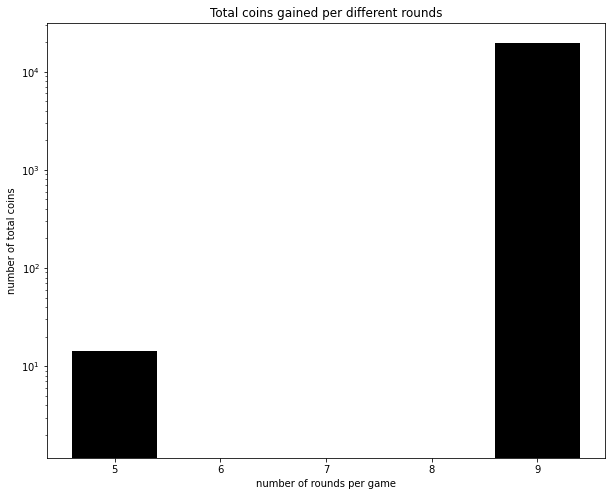

In [8]:
from matplotlib.backends.backend_pdf import PdfPages
# a list for different rounds
round_list = [5.0, 9.0]


for round_idx in round_list:
    
    #boolean index to get rounds
    bool_round = df_per_game['round_idx'] == round_idx
    df_round = df_per_game.loc[bool_round, :]
    
    # plot bar
    plt.bar(x = df_per_game['round_idx'], height = df_per_game['coin_total'],
           color = 'black')

# labeling
plt.title('Total coins gained per different rounds')
plt.xlabel('number of rounds per game')
plt.ylabel('number of total coins')
plt.yscale('log')
plt.gcf().set_size_inches(10, 8)

# download to pdf
f = 'total_coin.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

    

### Respond:
As the bar chart indicated, shorter games do associated with fewer coins earned by both players.

## Part B:
Which method "won" triple-or-nothing?  You may need to make assumptions to define precisely what "winning" is.  Feel free to do so, but clearly indicate them to the grader. 

#### Hints:
- Our solution uses a [bar plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), but other solutions welcome too
- I found some of the names quite long to label the axis, maybe:
    - shortening each to only the first 10 letters `name[:10]`
    - rotating the labels a bit `plt.xticks(rotation = 15)`


### respond:
Definition of Winning method: method that allows the players to win the most amount of total coin


As shown in the bar plot below, the winning strategy is Guinea Pig in triple-or-nothing.

In [9]:
# import defaultdict and import pdfpage
from collections import defaultdict
from matplotlib.backends.backend_pdf import PdfPages

In [10]:
# create a dictionary: key - method, value - # of winnings
method_count = defaultdict(int)

# check value for specified col in each row
for idx, row in df_per_round.iterrows():
    name0 = df_per_round.iloc[idx, :]['name0']
    name1 = df_per_round.iloc[idx, :]['name1']
    coin0 = df_per_round.iloc[idx, :]['coin_total0']
    coin1 = df_per_round.iloc[idx, :]['coin_total1']
    
    # add the winning method to dictionary
    if coin0 > coin1:
        method_count[name0[:10]] += 1            
    elif coin0 < coin1:
        method_count[name1[:10]] += 1
    else:
        # ignore the row
        pass
        
# used stackover flow code to figure out sorting dictionaries by value (not taught in class)
method_count = dict(sorted(method_count.items(), key=lambda item: item[1]))
print(method_count)

{'Misha:)': 2, 'any_gamble': 4, 'optimal_fr': 5, 'gregatron': 25, 'increasing': 40, 'copycat': 44, 'Adaptive P': 45, 'FiftyFifty': 56, 'Follow-you': 57, 'Alternatin': 58, 'gonna slee': 76, 'Overly Com': 106, 'Guinea Pig': 108}


In [11]:
# list of key and value in dictionary
method = list(method_count.keys())
winnings = list(method_count.values())

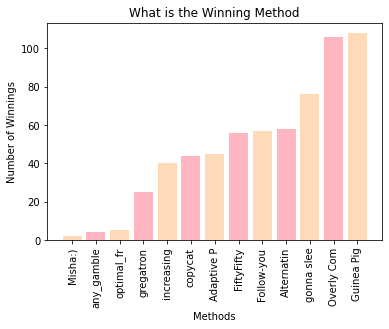

In [12]:
# plot the bars and labels
plt.bar(method, winnings, tick_label = method, color = ['peachpuff', 'lightpink'])
plt.xticks(rotation = 90)
plt.xlabel("Methods")
plt.ylabel("Number of Winnings")
plt.title("What is the Winning Method")

# download to pdf
f = 'method.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

## Part C (+1 pts extra credit):
Ask and answer a question of interest to you from this dataset.  Submissions will be evaluated on:
- creativity / insightfulness of result
- graph communication clarity
    - maybe use another graph type from [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

Some questions I found compelling:
- Which single player's strategy had the greatest impact on who won the most coins across all games?  
- Was cooperating (choosing smaller fractions so the jar of money grows) associated with higher earnings within the game?  Use the average fraction of a player across the whole game as a measure of their cooperation.
- How did user's fractions change as rounds went on?  Were they typically higher or lower in the early / late game?
- Consider the total amount of coins paid out in an individual game between two players (a "matchup").  Was it the case that every matchup provided players roughly the same amount of coins, or were some matchups far more profitable for players than others?

Though you needn't answer these.  Have a "conversation" with the data, as shown in class, and see what it has to say worth sharing :)


# Question
### What is the relationship between total coins per game and the number of games? 
 
There is no relationship (no patterns) between the total amount of coins earned per game and the number of games. From the chart, it shows that the amount of total coins varies per game. A majority of the plots are within y = 0 and y = 100, meaning most values of total_coins are under 10.

In [13]:
# create a new column: coin_total
df_per_game['coin_total'] = df_per_game['coin_total0'] + df_per_game['coin_total1']
df_per_game

,name0,name1,round_idx,coin_total0,coin_total1,coin_total
0,Adaptive Play 0.5 to 1,Alternating For Fun,5.0,1.542268,0.891144,2.433412
1,Adaptive Play 0.5 to 1,FiftyFifty,5.0,4.174042,2.180150,6.354192
2,Adaptive Play 0.5 to 1,Follow-your-heart,5.0,1.186890,1.114380,2.301270
3,Adaptive Play 0.5 to 1,Guinea Pig,5.0,1.582824,1.874236,3.457060
4,Adaptive Play 0.5 to 1,Overly Complicated Normal Distributed Biased F...,5.0,1.230017,1.554749,2.784766
...,...,...,...,...,...,...
69,optimal_frac_strat,Overly Complicated Normal Distributed Biased F...,9.0,7.532615,12.746274,20.278889
70,optimal_frac_strat,any_gamblers?,9.0,0.000000,12990.780000,12990.780000
71,optimal_frac_strat,copycat,9.0,320.864800,300.279656,621.144456
72,optimal_frac_strat,gonna sleep,9.0,7.532615,12.746274,20.278889


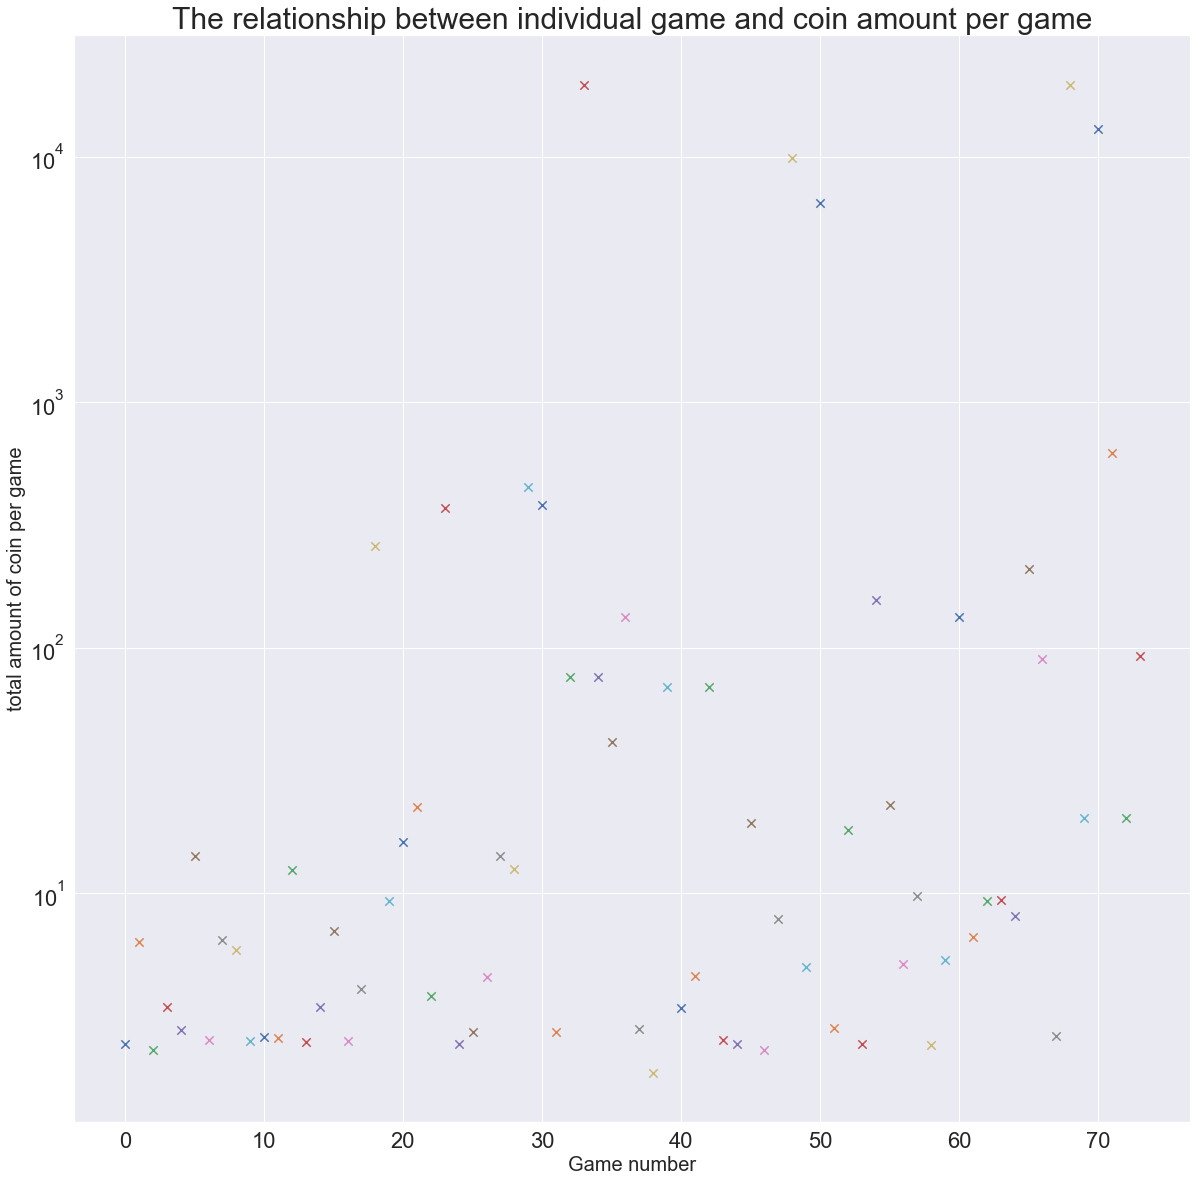

In [14]:
# import pdfpages
from matplotlib.backends.backend_pdf import PdfPages

# import seaborn
import seaborn as sns
sns.set(font_scale = 2)

# find the value of the coin_total for each game (aka rows)
for idx, row in df_per_game.iterrows():
    coin = df_per_game.iloc[idx, :]['coin_total']
    # plot with adjusted markersize
    plt.scatter(idx, coin, marker = 'x', s = 70)

# label
plt.xlabel('Game number', fontsize = 20)
plt.ylabel('total amount of coin per game', fontsize = 20)
plt.yscale('log')
plt.title('The relationship between individual game and coin amount per game', fontsize = 30)
plt.gcf().set_size_inches(20, 20)

# download to pdf
f = 'relationship.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')